In [1]:
import pandas as pd

# CSV 파일 경로
file_path = r'C:\Users\USER\projects\project_study\1주_실습데이터.csv'

# CSV 파일 불러오기
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

         X1        X2        X3        X4        X5        X6        X7  \
0  0.202296  0.003560  0.411261  0.015348  0.693147  0.036360  0.343512   
1  0.006836  0.007688  0.597304  0.015348  0.686838  0.067407  0.347869   
2  0.609621  0.001461  0.466186  0.015348  0.693090  0.018944  0.345032   
3  0.074007  0.003072  0.535876  0.015348  0.693147  0.031475  0.347502   
4  0.198356  0.007020  0.416238  0.015348  0.686838  0.061888  0.347441   

         X8        X9       X10  ...       X12       X13       X14       X15  \
0  0.028087  0.681974  0.295769  ...  0.682731  0.249262  0.681974  0.016330   
1  0.028640  0.497403  0.297943  ...  0.680891  0.249262  0.497403  0.670040   
2  0.024502  0.647685  0.298255  ...  0.685525  0.249262  0.647685  0.648486   
3  0.025393  0.587787  0.296057  ...  0.677980  0.249262  0.575364  0.632563   
4  0.028450  0.537143  0.298167  ...  0.673286  0.249262  0.537143  0.671124   

        X16       X17       X18       X19       X20  Y  
0  0.242926

In [3]:
unique_values_per_column = data.loc[:, 'X1':'X20'].nunique()
unique_values_per_column
#제거
data = data.drop(columns=['X4', 'X13'])
data.head(1)

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,X12,X14,X15,X16,X17,X18,X19,X20,Y
0,0.202296,0.00356,0.411261,0.693147,0.03636,0.343512,0.028087,0.681974,0.295769,0.003053,0.682731,0.681974,0.01633,0.242926,0.557461,0.028087,0.682731,0.03636,0


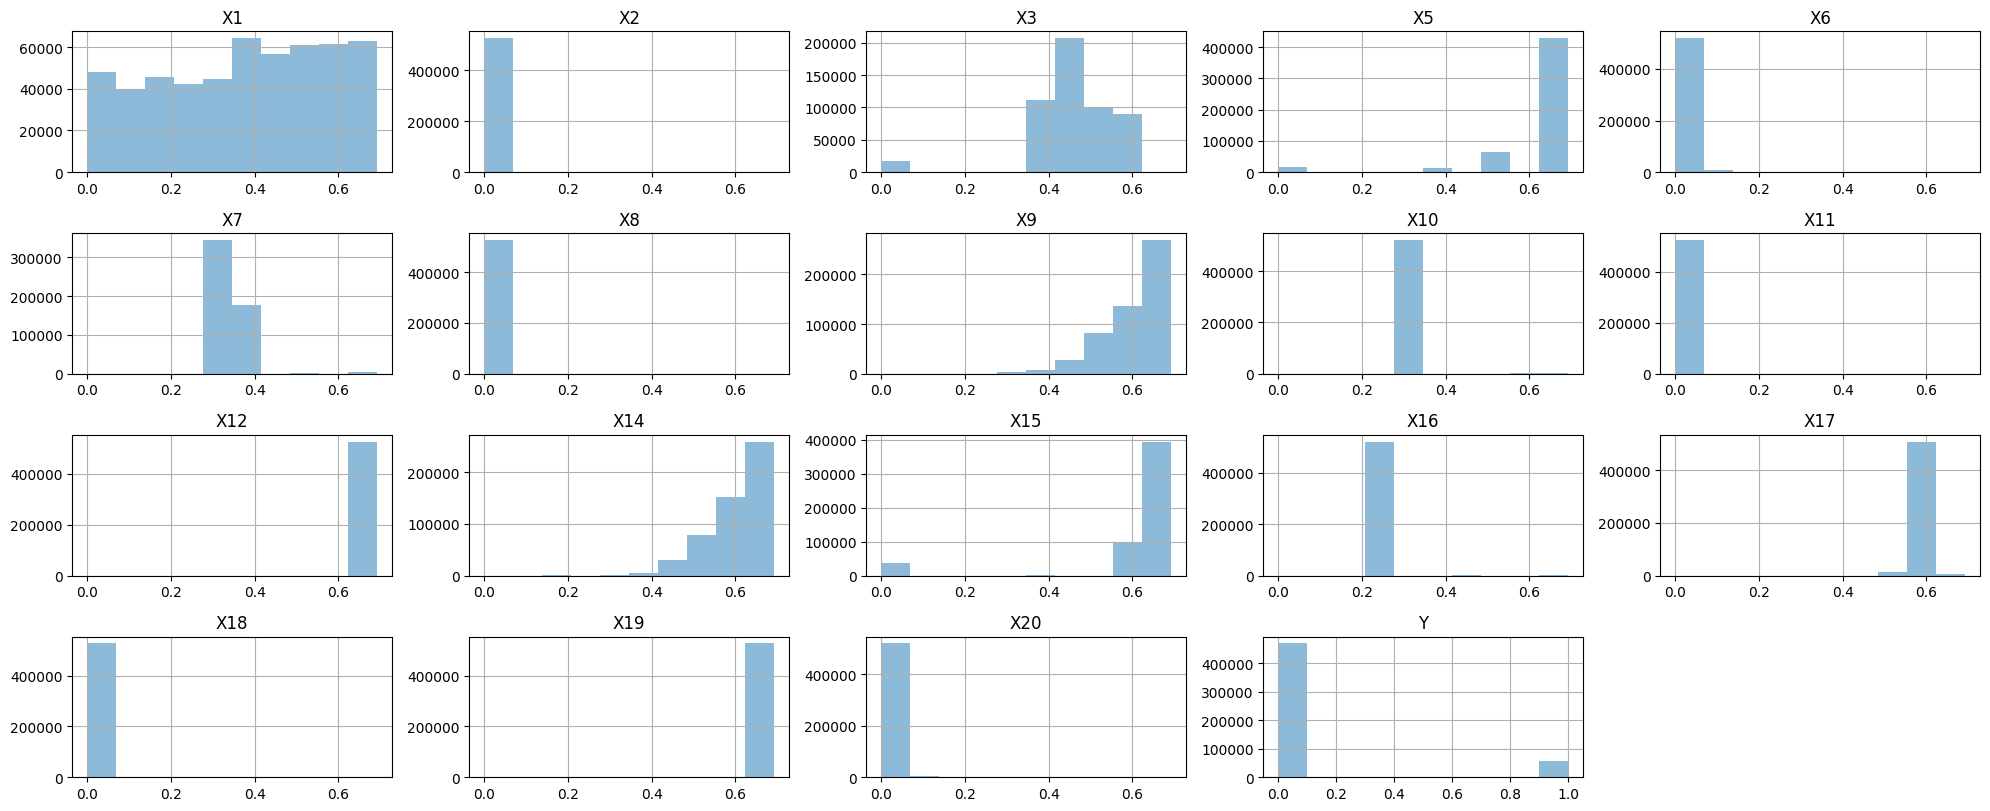

In [4]:
#각 열에 대한 수치를 한눈에 보기 위해 히스토그램을 이용해 시각화 해보았습니다.
#이 히스토그램을 통해 해당 열의 데이터가 어떤 특성을 갖는지 이상치가 있는지 등을 대략적으로 파악할 수 있었고 한쪽으로 치우친 경우 해당 방향으로의 이상치가 있는지 의심해볼 수 있었습니다.

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

for i, column in enumerate(data.columns):
    plt.subplot(5, 5, i+1)  
    data[column].hist(alpha=0.5)  
    plt.title(column)

plt.tight_layout()  
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
# 특성과 타겟 변수 분리
X = data.drop('Y', axis=1)
y = data['Y']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost 모델 훈련
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train, y_train)

# 변수 중요도 추출
feature_importances = model.feature_importances_

In [12]:
import numpy as np

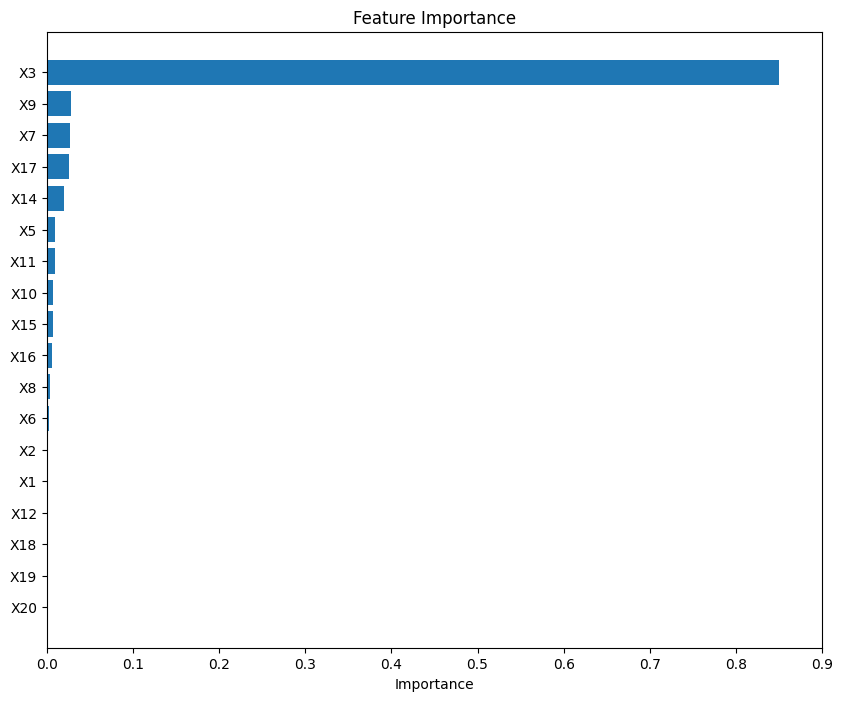

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
features = X_train.columns

# 가정: feature_importances는 이미 계산된 피처 중요도 배열
# features = X_train.columns # X_train이 pandas DataFrame일 경우
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 막대 그래프로 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # y축 순서 뒤집기

# x축 눈금 간격 설정
plt.xticks(np.arange(min(importance_df['Importance']), max(importance_df['Importance']) + 0.1, 0.1))

plt.show()


In [16]:
#pip install shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


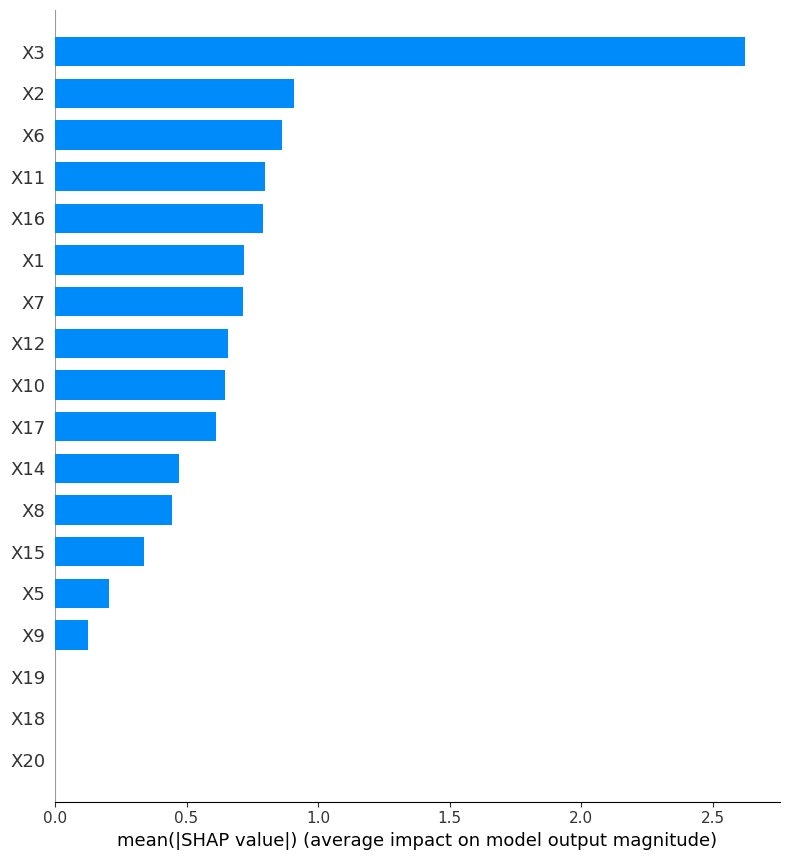

In [17]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# XGBoost 모델 훈련
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# SHAP 값 생성
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_train, plot_type="bar")


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


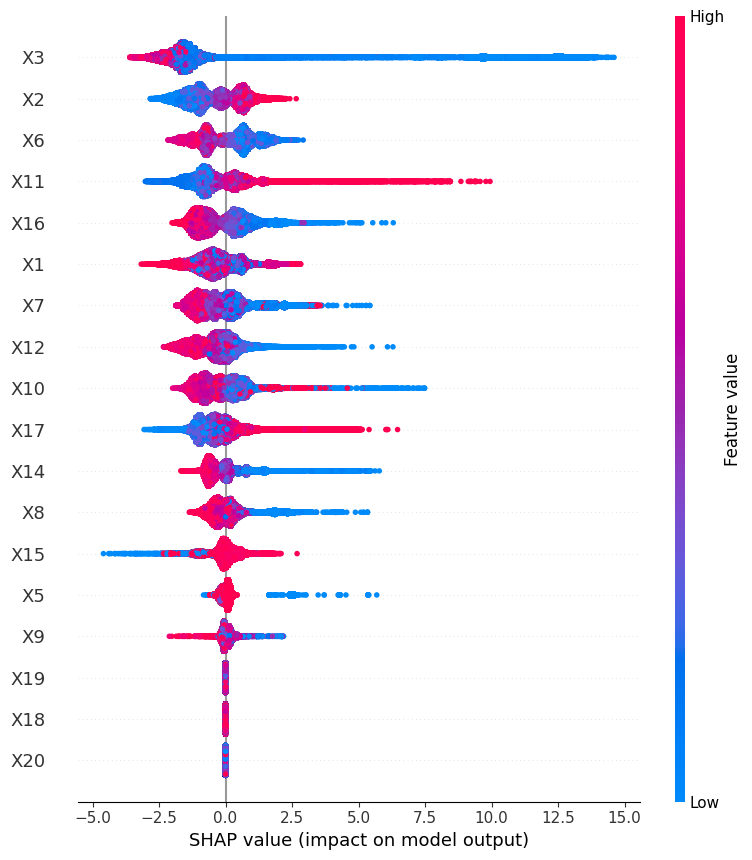

In [15]:
shap.summary_plot(shap_values, X_train) #x3수치가 작을수록 / x11과 x10에 수치가 높을수록 영향을준다.